MobileNetV2

MobileNet is tailored for resource-constrained environments such as mobile and embedded devices. It employs depthwise separable convolutions to reduce computational complexity while maintaining performance. MobileNet's lightweight design makes it well-suited for real-time applications where computational resources are limited, without compromising accuracy significantly.

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

from PIL import Image
import keras
from tensorflow.keras.preprocessing import image, image_dataset_from_directory
from tensorflow.keras import models, layers, optimizers
from keras.callbacks import ModelCheckpoint
from tensorflow.keras.layers import BatchNormalization

import os
import gc
from timeit import default_timer as timer

In [ ]:
import pandas as pd
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import scipy
import skimage
from skimage.transform import resize
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
Path_data = ('/content/drive/MyDrive/archive (1)')

data = os.listdir(Path_data)
Healthy = os.listdir("/content/drive/MyDrive/archive (1)/Healthy")
Mild = os.listdir('/content/drive/MyDrive/archive (1)/Mild DR')
Moderate = os.listdir('/content/drive/MyDrive/archive (1)/Moderate DR')
Proliferate = os.listdir('/content/drive/MyDrive/archive (1)/Proliferate DR')
Severe = os.listdir('/content/drive/MyDrive/archive (1)/Severe DR')





In [ ]:
print("classes names :", (data), "\n______________________________\n")
print("Number of classes :", len(data), "\n______________________________\n")
print("Number of Healty images :", len(Healthy), "\n______________________________\n")
print("Number of Mild images :", len(Mild),  "\n______________________________\n")
print("Number of Moderate images :", len(Moderate),  "\n______________________________\n")
print("Number of Proliferate images :", len(Proliferate),  "\n______________________________\n")
print("Number of severe images :", len(Severe),  "\n______________________________\n")

classes names : ['Proliferate DR', 'Mild DR', 'Healthy', 'Severe DR', 'Moderate DR'] 
______________________________

Number of classes : 5 
______________________________

Number of Healty images : 1000 
______________________________

Number of Mild images : 370 
______________________________

Number of Moderate images : 908 
______________________________

Number of Proliferate images : 290 
______________________________

Number of severe images : 190 
______________________________



In [ ]:
imgpaths = []
labels =[]

data = os.listdir(Path_data)

for i in data:
    classpath = os.path.join(Path_data, i)
    imglist = os.listdir(classpath)

    for img in imglist:
        imgpath = os.path.join(classpath, img)

        imgpaths.append(imgpath)
        labels.append(i)

Paths = pd.Series(imgpaths, name = 'Paths')
Labels = pd.Series(labels, name = 'Labels')

Df= pd.concat([Paths, Labels], axis = 1)
Df.head(5)

,Paths,Labels
0,/content/drive/MyDrive/archive (1)/Proliferate...,Proliferate DR
1,/content/drive/MyDrive/archive (1)/Proliferate...,Proliferate DR
2,/content/drive/MyDrive/archive (1)/Proliferate...,Proliferate DR
3,/content/drive/MyDrive/archive (1)/Proliferate...,Proliferate DR
4,/content/drive/MyDrive/archive (1)/Proliferate...,Proliferate DR


In [ ]:
train, testval = train_test_split(Df, test_size = 0.2, shuffle = True, random_state = 123)
valid, test = train_test_split(testval, test_size = 0.5, shuffle = True, random_state = 123)

print("Train shape: ", train.shape)
print("Valid shape: ", valid.shape)
print("Test shape: ",test.shape)

Train shape:  (2206, 2)
Valid shape:  (276, 2)
Test shape:  (276, 2)


In [ ]:
train.Labels.value_counts()

batch_size = 20   # As smaller, As more data generated ....In views of data size
img_size = (224, 224) # standard value (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
tr_G = ImageDataGenerator(
    zca_whitening=True,
    rotation_range=30.,
    fill_mode='nearest',
    )

V_G = ImageDataGenerator()

t_G = ImageDataGenerator()

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1444: UserWarning: This ImageDataGenerator specifies `zca_whitening`, which overrides setting of `featurewise_center`.
  warnings.warn(


In [ ]:
Train = tr_G.flow_from_dataframe(train, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
Valid = V_G.flow_from_dataframe(valid, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = True, batch_size = batch_size)
Test = t_G.flow_from_dataframe(test, x_col = 'Paths', y_col = 'Labels', target_size = img_size, class_mode = 'categorical', color_mode = 'rgb', shuffle = False, batch_size = batch_size)


Found 2206 validated image filenames belonging to 5 classes.
Found 276 validated image filenames belonging to 5 classes.
Found 276 validated image filenames belonging to 5 classes.


In [ ]:
L_index = Train.class_indices
L_index

{'Healthy': 0,
 'Mild DR': 1,
 'Moderate DR': 2,
 'Proliferate DR': 3,
 'Severe DR': 4}

In [ ]:
Keys = list(L_index.keys())
Keys

['Healthy', 'Mild DR', 'Moderate DR', 'Proliferate DR', 'Severe DR']

/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1861: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/preprocessing/image.py:1884: UserWarning: This ImageDataGenerator specifies `zca_whitening`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


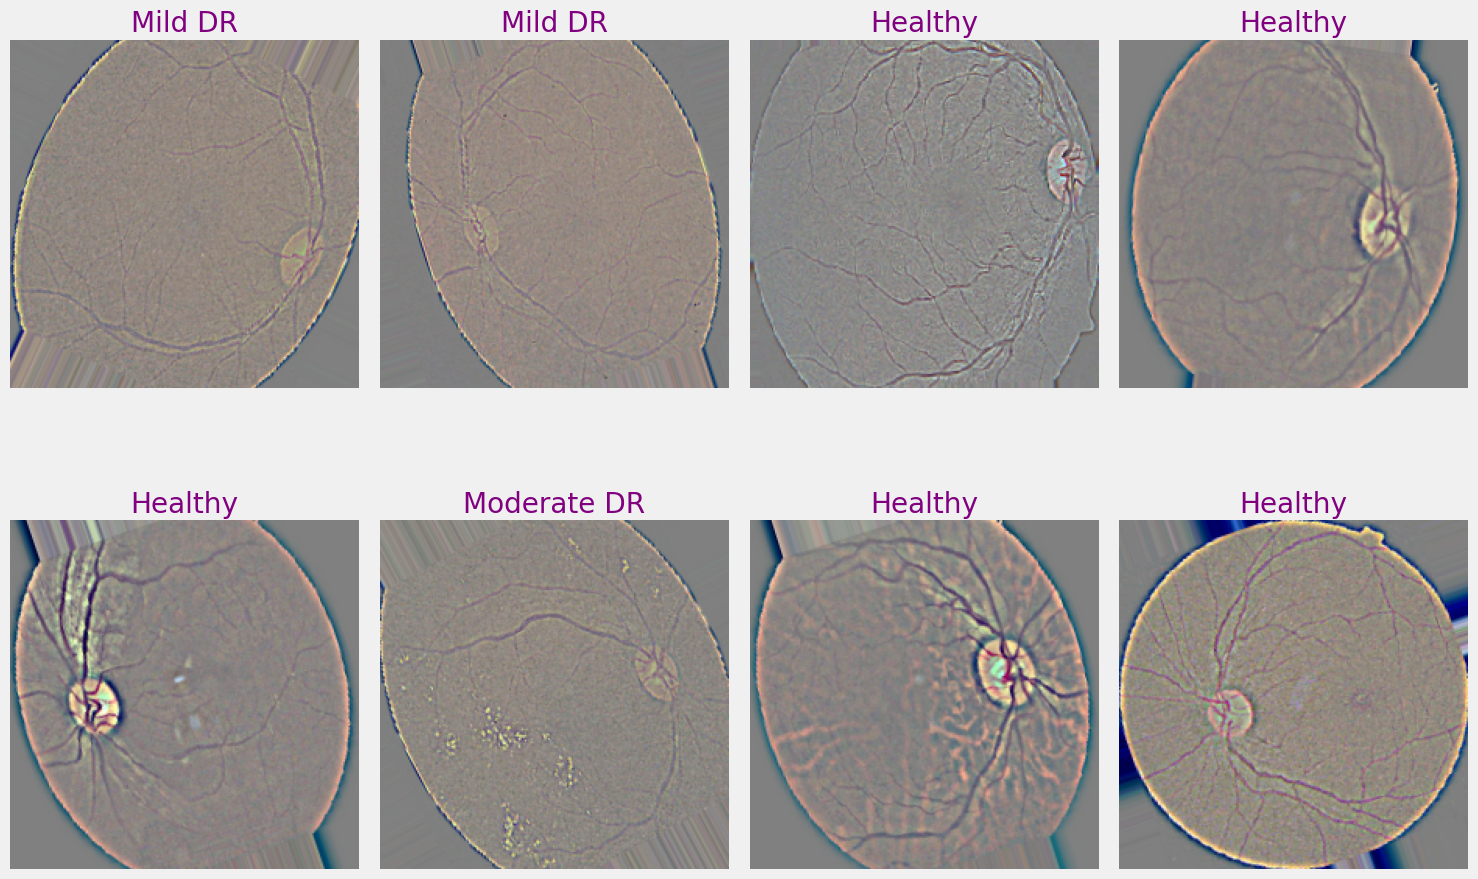

In [ ]:
imgs, labels = next(Train)

plt.figure(figsize= (15, 15))

for i in range(8):
    plt.subplot(3, 4, i +1)
    im = imgs[i]/255
    plt.imshow(im)

    #Labelling
    index = np.argmax(labels[i])
    label = Keys[index]
    plt.title(label, color = 'purple')
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
n_classes = len(list(Train.class_indices.keys()))
n_classes

5

In [ ]:
base_model = keras.applications.MobileNetV2(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(150, 150, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
inputs = keras.Input(shape=(150, 150, 3))
x = base_model(inputs, training=False)

# Convert features of shape `base_model.output_shape[1:]` to vectors
x = keras.layers.GlobalAveragePooling2D()(x)

# Apply ReLU activation
x = keras.layers.Activation('relu')(x)

# A Dense classifier with a single unit (binary classification)
outputs = keras.layers.Dense(5, activation ='softmax')(x)
model = keras.Model(inputs, outputs)

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss='categorical_crossentropy',
              metrics=['accuracy', 'Recall'])
start = timer()
history = model.fit(x= Train, epochs= 80, verbose= 1, validation_data= Valid, validation_steps= None, shuffle= True)
#history = model.fit(X_train, y_train, validation_data = (X_test , y_test), workers = 7, epochs=2)
#model.fit(train_g, epochs=100, validation_data=val_g, workers = 7)
end = timer()
elapsed = end - start
print('Total Time Elapsed: ', int(elapsed//60), ' minutes ', (round(elapsed%60)), ' seconds')

Epoch 1/80
111/111 [==============================] - 623s 6s/step - loss: 1.0716 - accuracy: 0.5966 - recall: 0.4556 - val_loss: 1.0612 - val_accuracy: 0.5978 - val_recall: 0.5471
Epoch 2/80
111/111 [==============================] - 172s 2s/step - loss: 0.9733 - accuracy: 0.6401 - recall: 0.5054 - val_loss: 0.9882 - val_accuracy: 0.6232 - val_recall: 0.4094
Epoch 3/80
111/111 [==============================] - 181s 2s/step - loss: 0.9435 - accuracy: 0.6523 - recall: 0.5213 - val_loss: 1.0276 - val_accuracy: 0.5942 - val_recall: 0.5072
Epoch 4/80
111/111 [==============================] - 165s 1s/step - loss: 0.9315 - accuracy: 0.6514 - recall: 0.5417 - val_loss: 1.0030 - val_accuracy: 0.6196 - val_recall: 0.5435
Epoch 5/80
111/111 [==============================] - 171s 2s/step - loss: 0.9182 - accuracy: 0.6578 - recall: 0.5494 - val_loss: 0.9870 - val_accuracy: 0.6341 - val_recall: 0.4529
Epoch 6/80
111/111 [==============================] - 192s 2s/step - loss: 0.9210 - accuracy: 0

In [ ]:
model.save('mobilenetv2-elu.h5')

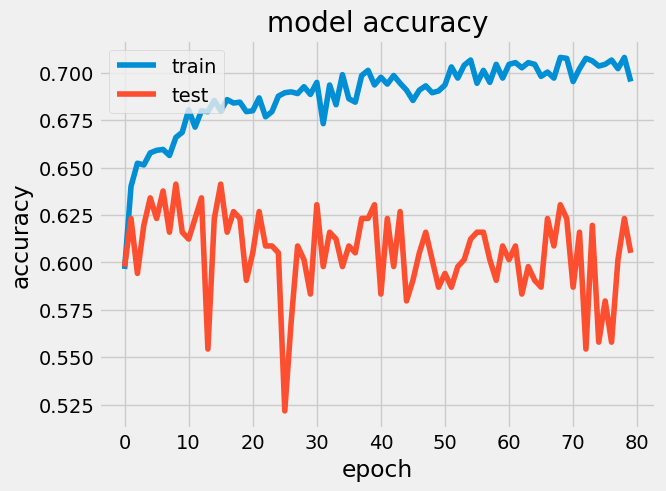

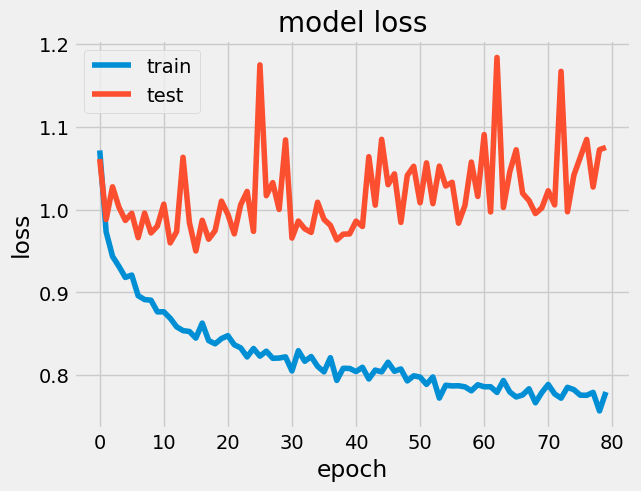

In [ ]:
import matplotlib.pyplot as plt
from keras.models import load_model


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()